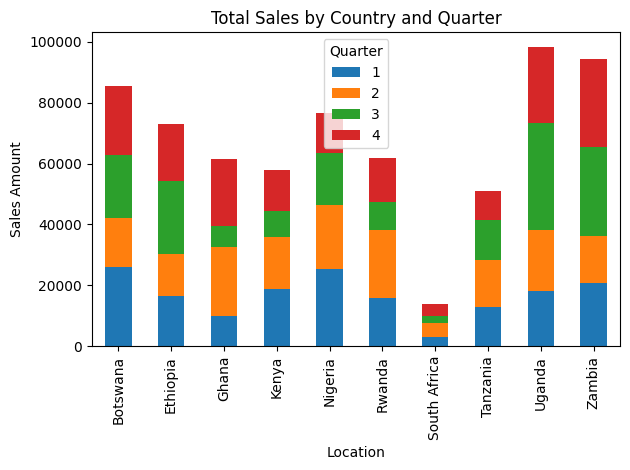

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connect to DW
conn = sqlite3.connect("retail_dw.db")

# Run Roll-up query
query = """
SELECT C.Location, T.Quarter, SUM(F.SalesAmount) AS TotalSales
FROM SalesFact F
JOIN CustomerDim C ON F.CustomerID = C.CustomerID
JOIN TimeDim T ON F.TimeID = T.TimeID
GROUP BY C.Location, T.Quarter
ORDER BY C.Location, T.Quarter;
"""
df_vis = pd.read_sql_query(query, conn)

# Pivot for plotting
pivot_df = df_vis.pivot(index="Location", columns="Quarter", values="TotalSales")

# Plot
pivot_df.plot(kind="bar", stacked=True)
plt.title("Total Sales by Country and Quarter")
plt.ylabel("Sales Amount")
plt.xlabel("Location")
plt.tight_layout()
plt.savefig("sales_by_country_quarter.png")  
plt.show()



# OLAP Analysis 

The bar chart titled *"Total Sales by Country and Quarter"* provides a visual summary of sales performance across ten countries, segmented by quarterly periods. When analyzed through the lens of the OLAP star schema — comprising `CustomerDim`, `ProductDim`, `TimeDim`, and the central `SalesFact` table — the chart reveals meaningful patterns that inform strategic decision-making.

At the core of this analysis is the *roll-up operation*, which aggregates `SalesAmount` from the `SalesFact` table by joining it with `CustomerDim.Location` and `TimeDim.Quarter`. This enables a multi-dimensional view of sales, allowing stakeholders to compare performance across both geography and time. The chart’s structure reflects this aggregation, with each country’s total sales broken down into four quarterly segments.

*Uganda* stands out as the top-performing country, with particularly strong sales in Quarter 3 and Quarter 4. This suggests robust market engagement during the latter half of the year, possibly driven by seasonal demand, end-of-year promotions, or increased consumer activity. Similarly, *Zambia* and *Botswana* show high cumulative sales, especially in Quarter 2 and Quarter 3, indicating effective mid-year campaigns or favorable market conditions.

In contrast, *Kenya* exhibits a distinct seasonal pattern, with sales peaking in Quarter 1 and Quarter 4. This fluctuation may align with national holidays, fiscal cycles, or targeted promotional efforts. Such insights are valuable for inventory planning and marketing alignment, ensuring that resources are concentrated during high-demand periods.

Countries like *South Africa*, *Nigeria*, and *Ghana* maintain moderate and steady sales across all quarters, reflecting consistent but less dynamic market activity. Meanwhile, *Ethiopia*, *Rwanda*, and *Tanzania* show relatively low sales volumes, suggesting limited market penetration or untapped potential. These regions may benefit from targeted outreach or exploratory campaigns to stimulate growth.

Although the chart does not explicitly segment by product category, the underlying schema supports *slice operations* that could isolate high-performing segments such as Electronics. By filtering `ProductDim.Category`, analysts can assess how specific product types contribute to regional sales trends, enabling more granular decision-making around bundling, pricing, and advertising.

The modular design of the star schema separating facts from dimensions facilitates this flexible analysis. It empowers users to perform roll-up, drill-down, and slice operations with minimal query complexity, making it an ideal structure for business intelligence tasks.

TShe OLAP analysis reveals clear geographic and temporal sales patterns, highlights high-performing regions and quarters, and underscores the value of a well-designed data warehouse schema. By leveraging these insights, organizations can optimize their marketing strategies, inventory management, and product focus to drive growth and efficiency.